# North Carolina - Analysis

## Required Packages

In [1]:
# For working with graphs
import networkx as nx
# For making plots
import matplotlib.pyplot as plt
import numpy as np

# Needed for gerrchain
import gerrychain   
from gerrychain import Graph, Partition, proposals, updaters, constraints, accept, MarkovChain, GeographicPartition
from gerrychain.updaters import cut_edges, Tally
from gerrychain.tree import recursive_tree_part
from gerrychain.proposals import recom
from gerrychain.accept import always_accept
from functools import partial
import geopandas as gpd
import pandas as pd

# To fix any data issues
import maup
from maup import smart_repair

## Import the File and Use Maup to Repair

In [2]:
nc_gdf = gpd.read_file("NorthCarolina_precincts_with_data/NorthCarolina_precincts_with_data.shp")

In [3]:
# Check for any invalid geometries.
maup.doctor(nc_gdf)

There are 9 overlaps.
There are 191 holes.


False

In [4]:
# Repair invalid geometries using buffer.
nc_gdf.loc[~nc_gdf['geometry'].is_valid, 'geometry'] = nc_gdf.loc[~nc_gdf['geometry'].is_valid, 'geometry'].buffer(0)

In [6]:
# Check geodataframe using maup's doctor function
maup.doctor(nc_gdf)

There are 9 overlaps.
There are 191 holes.


False

In [5]:
# Use Smart Repair to remove the holes.
nc_gdf = smart_repair(nc_gdf)

/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/s

Snapping all geometries to a grid with precision 10^( -4 ) to avoid GEOS errors.


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:372: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = set()


Identifying overlaps...


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:415: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = pieces_df["polygon indices"][i].union({j})


Resolving overlaps...


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:487: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][this_poly_ind] = unary_union([geometries_df["geometry"][this_poly_ind], this_piece])
/

Assigning order 2 pieces...
Assigning order 3 pieces...
Filling gaps...


Gaps to simplify:   0%|          | 0/13 [00:00<?, ?it/s]/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/maup/smart_repair.py:1207: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  holes_df.geometry[h_ind] = orient(holes_df.geometry[h_i

In [8]:
# Confirm that everything is fixed. 
maup.doctor(nc_gdf)

True

In [7]:
# Change some of the column names to standardize.
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

nc_gdf.rename(columns = {'OriginalPl': "Original_CD", "TempPlan": "Temp_CD", "RevisedPla": "Adopted_CD", "P1_001N": "Total Population", "P1_002N": "1RPop", "P1_003N": "WPOP", "P1_004N": "BPOP", "P1_005N": "NPOP", "P1_006N": "APOP", "P1_007N": "PIPOP", "P1_008N": "Other"}, inplace=True)

print(nc_gdf.columns)

nc_graph = Graph.from_geodataframe(nc_gdf, ignore_errors = True)

Index(['UNIQUE_ID', 'COUNTYFP', 'COUNTYNM', 'PRECINCT', 'G22USSDBEA',
       'G22USSRBUD', 'Original_CD', 'Temp_CD', 'Adopted_CD',
       'Total Population', '1RPop', 'WPOP', 'BPOP', 'NPOP', 'APOP', 'PIPOP',
       'Other', 'geometry'],
      dtype='object')


/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/gerrychain/graph/graph.py:457: UserWarning: NA values found in column Total Population!
  warnings.warn("NA values found in column {}!".format(column))
/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/gerrychain/graph/graph.py:457: UserWarning: NA values found in column 1RPop!
  warnings.warn("NA values found in column {}!".format(column))
/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/gerrychain/graph/graph.py:457: UserWarning: NA values found in column WPOP!
  warnings.warn("NA values found in column {}!".format(column))
/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/gerrychain/graph/graph.py:457: UserWarning: NA values found in column BPOP!
  warnings.warn("NA values found in column {}!".format(column))
/opt/anaconda3/envs/Math195/lib/python3.12/site-packages/gerrychain/graph/graph.py:457: UserWarning: NA values found in column NPOP!
  warnings.warn("NA values found in column {}!".format(column))
/o

## What do the Current Maps Look Like?

### Original CD Plan

<Axes: >

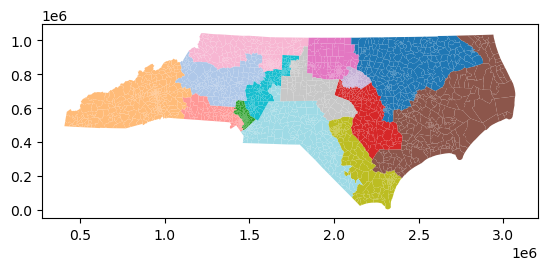

In [8]:
# Draw the map of the districting plan
nc_gdf.plot(column = "Original_CD", cmap='tab20')

### Temporary CD Plan

<Axes: >

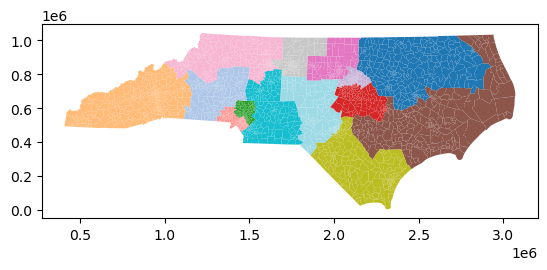

In [9]:
nc_gdf.plot(column = "Temp_CD", cmap = 'tab20')

### Adopted CD Plan

<Axes: >

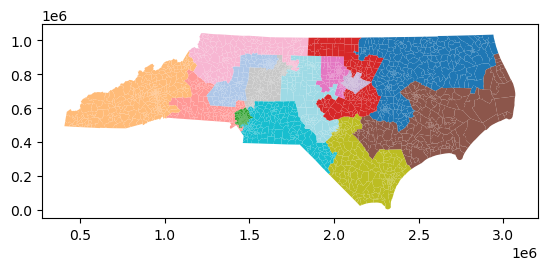

In [10]:
nc_gdf.plot(column = "Adopted_CD", cmap='tab20')

### Current Population Maps

<Axes: >

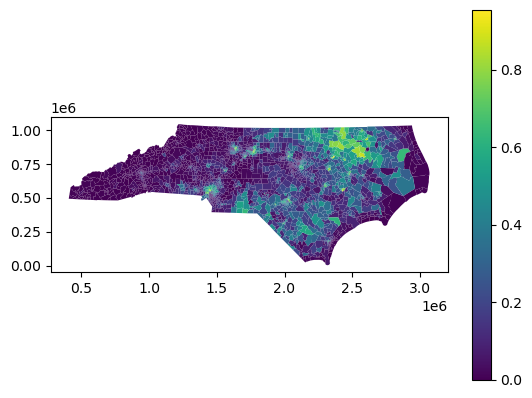

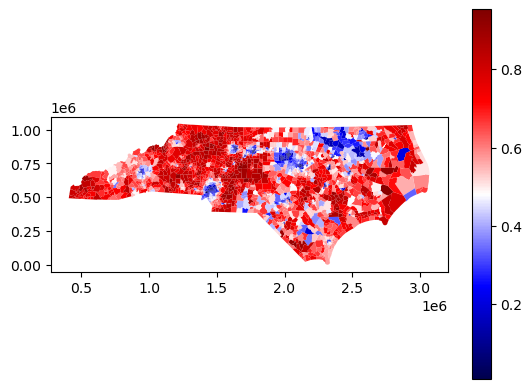

In [11]:
# Plot the black population percentage by precincts
nc_gdf['b_frac'] = pd.to_numeric(nc_gdf['BPOP'])/pd.to_numeric(nc_gdf['Total Population'])
nc_gdf.plot(column = 'b_frac', missing_kwds = {"color": "grey"}, legend=True)

# Plot the Presidential republican votes by precincts
nc_gdf['pref_party'] = pd.to_numeric(nc_gdf['G22USSRBUD'])/pd.to_numeric(nc_gdf['G22USSRBUD'] + nc_gdf['G22USSDBEA'])
nc_gdf.plot(column = 'pref_party', missing_kwds = {"color": "grey"}, legend=True, cmap = 'seismic')



## Getting Ready for the Ensemble Analysis

In [21]:
# Get the information at the Nodes
print("Information at Nodes: ", nc_graph.nodes()[0].keys())
tot_pop = sum([nc_graph.nodes()[v]['Total Population'] for v in nc_graph.nodes()])
print("Total Population: ", tot_pop)


Information at Nodes:  dict_keys(['boundary_node', 'area', 'UNIQUE_ID', 'COUNTYFP', 'COUNTYNM', 'PRECINCT', 'G22USSDBEA', 'G22USSRBUD', 'Original_CD', 'Temp_CD', 'Adopted_CD', 'Total Population', '1RPop', 'WPOP', 'BPOP', 'NPOP', 'APOP', 'PIPOP', 'Other', 'geometry'])


TypeError: 'numpy.float64' object is not callable

In [22]:
nc_gdf["Total Population"] = int(nc_gdf["Total Population"])

TypeError: cannot convert the series to <class 'int'>

In [13]:
nc_gdf["Total Population"]

sum = nc_gdf["Total Population"].sum()

print(sum)

10439388.0


In [46]:
sum = 0
for v in range(90):
    sum += nc_graph.nodes()[v]['Total Population']
print(sum)

print(nc_graph.nodes()[90]['Total Population'])

269694.0
nan


In [50]:
nc_gdf.iloc[90]

UNIQUE_ID                                WAKE---PRECINCT 01-07A
COUNTYFP                                                    183
COUNTYNM                                                   WAKE
PRECINCT                                        PRECINCT 01-07A
G22USSDBEA                                                   99
                                    ...                        
PIPOP                                                       NaN
Other                                                       NaN
geometry      MULTIPOLYGON (((2103898.2611 739839.5192, 2103...
b_frac                                                      NaN
pref_party                                                0.208
Name: 90, Length: 20, dtype: object